<a href="https://colab.research.google.com/github/Pria91/Machine-Learning-Projects-/blob/main/AirlinesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Lets import the libraries and input data file***

In [42]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt  

df = pd.read_csv('/content/data_sof.csv')
df

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEP_DELAY_NEW
0,19393,10821,1082103,30852,14122,1412202,30198,0.0
1,19393,10821,1082103,30852,14122,1412202,30198,1.0
2,19393,10821,1082103,30852,14122,1412202,30198,11.0
3,19393,10821,1082103,30852,14122,1412202,30198,29.0
4,19393,10821,1082103,30852,14307,1430702,30721,0.0
...,...,...,...,...,...,...,...,...
445822,21171,12892,1289203,32575,11259,1125903,30194,0.0
445823,21171,11259,1125903,30194,12892,1289203,32575,8.0
445824,21171,12892,1289203,32575,11259,1125903,30194,0.0
445825,21171,11259,1125903,30194,12892,1289203,32575,0.0


In [9]:
df.info

<bound method DataFrame.info of         OP_CARRIER_AIRLINE_ID  ...  DEP_DELAY_NEW
0                       19393  ...            0.0
1                       19393  ...            1.0
2                       19393  ...           11.0
3                       19393  ...           29.0
4                       19393  ...            0.0
...                       ...  ...            ...
445822                  21171  ...            0.0
445823                  21171  ...            8.0
445824                  21171  ...            0.0
445825                  21171  ...            0.0
445826                  21171  ...            0.0

[445827 rows x 8 columns]>

In [10]:
df.shape

(445827, 8)

In [11]:
df.columns

Index(['OP_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEP_DELAY_NEW'],
      dtype='object')

***Lets find the null values, if any, in data set***

In [ ]:
# TO FIND OUT TOTAL NUMBER OF NULL VALUES IN EVERY COLUMN 

In [16]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

DEP_DELAY_NEW    11473
dtype: int64

In [17]:
df.isnull().sum()

OP_CARRIER_AIRLINE_ID        0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST_CITY_MARKET_ID          0
DEP_DELAY_NEW            11473
dtype: int64

In [ ]:
# There is only one column DEP_DELAY_NEW which has 11473 nulls 

In [ ]:
# TO FIND EVERY ROW THAT HAS ATLEAST ONE NULL 

In [22]:
df[df.isnull().any(axis = 1)][null_columns]

,DEP_DELAY_NEW
192,NaN
344,NaN
532,NaN
687,NaN
2059,NaN
...,...
445189,NaN
445200,NaN
445212,NaN
445240,NaN


***Cleaning the data - getting rid of null values***

In [ ]:
# DROP ROWS WITH THE MISSING VALUES

In [29]:
dff = df.dropna()
dff

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEP_DELAY_NEW
0,19393,10821,1082103,30852,14122,1412202,30198,0.0
1,19393,10821,1082103,30852,14122,1412202,30198,1.0
2,19393,10821,1082103,30852,14122,1412202,30198,11.0
3,19393,10821,1082103,30852,14122,1412202,30198,29.0
4,19393,10821,1082103,30852,14307,1430702,30721,0.0
...,...,...,...,...,...,...,...,...
445822,21171,12892,1289203,32575,11259,1125903,30194,0.0
445823,21171,11259,1125903,30194,12892,1289203,32575,8.0
445824,21171,12892,1289203,32575,11259,1125903,30194,0.0
445825,21171,11259,1125903,30194,12892,1289203,32575,0.0


*** TO REMOVE All origin airports that have less than 5 airlines***

In [ ]:
# MINIMUM IN EACH COLUMN DISPLAYED

In [30]:
dff.min()

OP_CARRIER_AIRLINE_ID      19393.0
ORIGIN_AIRPORT_ID          10135.0
ORIGIN_AIRPORT_SEQ_ID    1013503.0
ORIGIN_CITY_MARKET_ID      30070.0
DEST_AIRPORT_ID            10135.0
DEST_AIRPORT_SEQ_ID      1013503.0
DEST_CITY_MARKET_ID        30070.0
DEP_DELAY_NEW                  0.0
dtype: float64

In [ ]:
#LENGTH OF UNIQUE ENTRY IN ONE PARTICULATR COLUMN i.e. NO REPETITION OF ENTRY 

In [46]:
len(dff['ORIGIN_AIRPORT_ID'].unique())

294

In [ ]:
# NAME/ID OF EACH UNIQUE ENTRY IN THAT PARTICULAR COLUMN 

In [47]:
dff['ORIGIN_AIRPORT_ID'].unique()

array([10821, 10874, 10994, 11042, 11057, 11066, 11140, 11259, 11267,
       11278, 11292, 14321, 14492, 14524, 14570, 14576, 14635, 14679,
       14683, 14730, 14747, 14771, 14831, 14843, 14869, 14893, 14908,
       15016, 15304, 15370, 15376, 10140, 10257, 10279, 10397, 10423,
       13232, 13244, 13296, 13342, 13487, 13495, 13158, 13198, 11697,
       11721, 11884, 11986, 11996, 12191, 12206, 12264, 12278, 12339,
       12391, 12451, 12889, 12892, 12896, 12953, 12992, 13204, 10693,
       10713, 10721, 10792, 10800, 11423, 11433, 11481, 11540, 11618,
       13796, 13851, 13871, 13891, 13931, 14027, 14057, 14100, 14107,
       14122, 14193, 14307, 10529, 10599, 12982, 12173, 13830, 12402,
       12758, 14222, 12478, 11995, 11775, 12266, 14986, 11503, 11193,
       11641, 10620, 13930, 13485, 15249, 11298, 15323, 12448, 15412,
       13303, 10431, 14685, 12217, 14783, 13360, 13486, 15024, 14814,
       10208, 15096, 10299, 11624, 10408, 11109, 13230, 11953, 12441,
       10868, 11252,

In [38]:
# TOTAL COUNT OF EACH OF THE UNIQUE ENTRY IN THAT PARTICULAR COLUMN 

In [37]:
# IF YOU ADD COUNTS OF EACH UNIQUE ENTRY, IT WILL SUM UPTO TOTAL NUMBER 434354

In [71]:
pd.set_option('display.max_rows', 500) 
dff['ORIGIN_AIRPORT_ID'].value_counts()

10397    29465
13930    18269
11292    17325
11298    16344
12892    16131
14107    12871
14771    12794
12889    11988
12266    11504
13204    10466
14747     9674
13487     9493
11433     9321
10721     8814
14869     8640
11057     8625
11618     7704
12478     7552
12953     7487
11697     7452
10821     6550
13232     6536
14679     5911
13303     5906
15304     5856
11278     5840
11259     5727
14100     5319
12191     4473
15016     4250
14057     4103
12173     3860
10693     3731
13796     3605
10423     3542
13495     3461
14908     3423
13198     3264
14635     3219
14831     3179
14893     3119
13342     2664
11042     2616
14492     2398
14843     2349
14027     2327
14683     2324
12264     2290
12339     2163
13830     1905
14122     1853
11066     1745
10800     1723
13891     1574
10529     1484
12451     1455
10140     1432
15376     1409
13871     1392
13851     1315
10792     1252
11193     1230
10299     1223
15370     1192
10713     1164
13244     1120
14524     

In [74]:
# CONCLUSION - AS SHOWN ABOVE, AIRPORT ID = 14588 & 15497 HAVE ENTRIES LESS THAN 5 - 4 AND 3 RESPECTIVELY
# LETS GET RID OF THESE 

In [80]:
i = dff[(dff.ORIGIN_AIRPORT_ID == 15497)].index
i

Int64Index([435124, 438011, 439699], dtype='int64')

In [88]:
# 3 ROWS AS ABOVE

In [81]:
j = dff[(dff.ORIGIN_AIRPORT_ID == 14588)].index
j

Int64Index([388838, 388839, 388840, 388841], dtype='int64')

In [87]:
# 4 ROWS AS ABOVE

In [86]:
df_1 = dff.drop(i)
df_2 = df_1.drop(j)

df_2

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEP_DELAY_NEW
0,19393,10821,1082103,30852,14122,1412202,30198,0.0
1,19393,10821,1082103,30852,14122,1412202,30198,1.0
2,19393,10821,1082103,30852,14122,1412202,30198,11.0
3,19393,10821,1082103,30852,14122,1412202,30198,29.0
4,19393,10821,1082103,30852,14307,1430702,30721,0.0
...,...,...,...,...,...,...,...,...
445822,21171,12892,1289203,32575,11259,1125903,30194,0.0
445823,21171,11259,1125903,30194,12892,1289203,32575,8.0
445824,21171,12892,1289203,32575,11259,1125903,30194,0.0
445825,21171,11259,1125903,30194,12892,1289203,32575,0.0


In [ ]:
# 434354 - 7 rows as above = 434347 

***TO LIST the code of the airlines most at fault in the origin airports that exceed the 90th percentile of
overall delays in 2016 for the month of January***

In [ ]:
# 90th PERCENTILE - IF VALUE n IS AT THE 90TH PERCENTILE, THEN n IS GREATER THAN k% OF THE VALUES USED IN THE SET

In [92]:
df_2.quantile(.9)

OP_CARRIER_AIRLINE_ID      20409.0
ORIGIN_AIRPORT_ID          14771.0
ORIGIN_AIRPORT_SEQ_ID    1477102.0
ORIGIN_CITY_MARKET_ID      33570.0
DEST_AIRPORT_ID            14771.0
DEST_AIRPORT_SEQ_ID      1477102.0
DEST_CITY_MARKET_ID        33570.0
DEP_DELAY_NEW                 29.0
Name: 0.9, dtype: float64

In [125]:
k = df_2[(df_2.DEP_DELAY_NEW > 29)].index
k

Int64Index([    13,     16,     19,     28,     29,     32,     35,     38,
                41,     42,
            ...
            445667, 445687, 445749, 445755, 445760, 445763, 445765, 445776,
            445806, 445808],
           dtype='int64', length=43121)

In [143]:
data = df_2.loc[df_2['DEP_DELAY_NEW'] > 29]
data

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEP_DELAY_NEW
13,19393,10821,1082103,30852,14321,1432103,34321,79.0
16,19393,10821,1082103,30852,14492,1449202,34492,30.0
19,19393,10821,1082103,30852,14492,1449202,34492,35.0
28,19393,10821,1082103,30852,14635,1463502,31714,64.0
29,19393,10821,1082103,30852,14679,1467903,33570,101.0
...,...,...,...,...,...,...,...,...
445763,21171,13830,1383002,33830,14771,1477102,32457,79.0
445765,21171,12889,1288903,32211,12892,1289203,32575,80.0
445776,21171,12264,1226402,30852,14771,1477102,32457,41.0
445806,21171,12889,1288903,32211,11259,1125903,30194,31.0


In [150]:
df_3 = df_2[df_2['DEP_DELAY_NEW'] > 29][['OP_CARRIER_AIRLINE_ID','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID', 'DEP_DELAY_NEW']]
df_3

,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,DEP_DELAY_NEW
13,19393,10821,14321,79.0
16,19393,10821,14492,30.0
19,19393,10821,14492,35.0
28,19393,10821,14635,64.0
29,19393,10821,14679,101.0
...,...,...,...,...
445763,21171,13830,14771,79.0
445765,21171,12889,12892,80.0
445776,21171,12264,14771,41.0
445806,21171,12889,11259,31.0


In [163]:
delay_total = df_2['DEP_DELAY_NEW'].sum()
delay_total

4679963.0

In [164]:
delay_ninety = df_3['DEP_DELAY_NEW'].sum()
delay_ninety

3638619.0

In [165]:
percentage = delay_ninety/delay_total
percentage

0.777488839121164

In [167]:
df_4 = df_3.head(100)

***VISUALISATIONS***

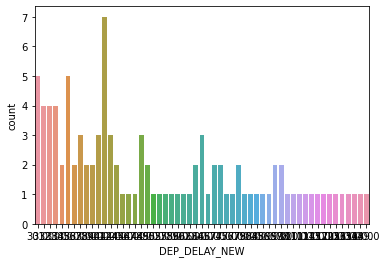

In [168]:
#Season with most number of matches(VISUALIZATION)
sns.countplot(x='DEP_DELAY_NEW', data=df_4)
plt.show()